In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/ML_LP3/emails.csv')

In [5]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df.shape

(5172, 3002)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [8]:
df.isna().any()

,0
Email No.,False
the,False
to,False
ect,False
and,False
...,...
military,False
allowing,False
ff,False
dry,False


In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(5172, 3002)

In [11]:
df=df.drop(['Email No.'],axis=1)

In [13]:
x=df.drop(['Prediction'],axis=1)
y=df['Prediction']

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=10)

In [15]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=10)

In [16]:
k_pred=knn.predict(xtest)

In [17]:
print('Accuracy of KNN', accuracy_score(ytest,k_pred)*100)
print('Precision of KNN', precision_score(ytest,k_pred))
print('Recall of KNN', recall_score(ytest,k_pred))
print('F1 of KNN', f1_score(ytest,k_pred))

Accuracy of KNN 87.47099767981439
Precision of KNN 0.7613065326633166
Recall of KNN 0.8189189189189189
F1 of KNN 0.7890625


Classification report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       923
           1       0.76      0.82      0.79       370

    accuracy                           0.87      1293
   macro avg       0.84      0.86      0.85      1293
weighted avg       0.88      0.87      0.88      1293

Confusion Matrix:



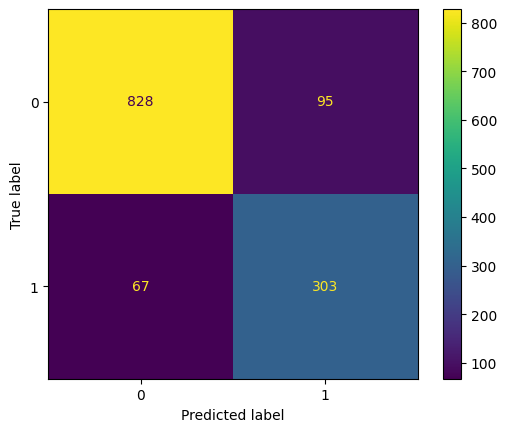

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
print("Classification report:\n",classification_report(ytest,k_pred))
print('Confusion Matrix:\n')
cm = confusion_matrix(ytest,k_pred)
display = ConfusionMatrixDisplay(cm,display_labels=knn.classes_)
display.plot()

In [23]:
svm=SVC(kernel='linear')
svm.fit(xtrain,ytrain)

SVC(kernel='linear')

In [24]:
s_pred=svm.predict(xtest)

In [26]:
print('Accuracy of SVM', accuracy_score(ytest,s_pred)*100)
print('Precision of SVM', precision_score(ytest,s_pred))
print('Recall of SVM', recall_score(ytest,s_pred))
print('F1 of SVM', f1_score(ytest,s_pred))

Accuracy of SVM 96.05568445475639
Precision of SVM 0.9230769230769231
Recall of SVM 0.9405405405405406
F1 of SVM 0.9317269076305221


Classification report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       923
           1       0.92      0.94      0.93       370

    accuracy                           0.96      1293
   macro avg       0.95      0.95      0.95      1293
weighted avg       0.96      0.96      0.96      1293

Confusion Matrix:



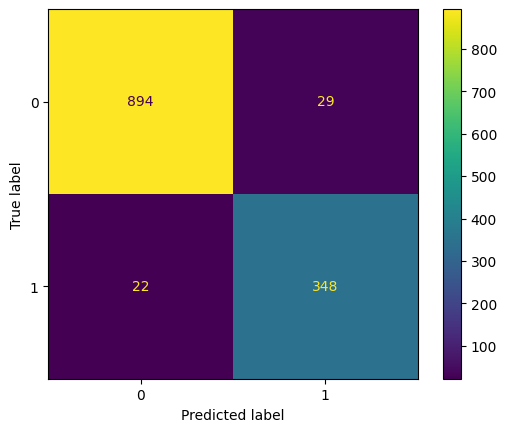

In [27]:
print("Classification report:\n",classification_report(ytest,s_pred))
print('Confusion Matrix:\n')
cm = confusion_matrix(ytest,s_pred)
display = ConfusionMatrixDisplay(cm,display_labels=svm.classes_)
display.plot()